import libraries

In [4]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from rasterData import *
import os


# Split the data 

In [5]:
par_dir = '/Users/aakash/Desktop/MTP2/codev2'
# w/o roads
# map_data_tif_path = par_dir + '/data/merged_file.tif'
# output_data_dir = par_dir + '/data/tile_data'
# w/ roads
map_data_tif_path = par_dir + '/data/merged_file_w_roads.tif'
output_data_dir = par_dir + '/data/tile_data_roads'

tile_size = 512
SPLIT_DATA = False


if(SPLIT_DATA):
    split_tif_into_tiles(map_data_tif_path, output_data_dir, tile_size)

# Merge According to bounding box

In [6]:
merged_data_path  = par_dir + '/data/temp/file.tif'
# outfile = par_dir + '/data/temp/file2.tif'
# manali (hanuman tibba - manali)
lon1, lat1 = 76.95459234317525,31.801679137058297
lon2, lat2 = 77.02411520084127,31.764177519360725

# bounding box = (left, bottom, right, top)
bounding_box = (lon1, lat2, lon2, lat1)
# bounding_box = (76.98328796870653,31.70144173323603, 77.01350037105028,31.737946830245892)

mergeFiles(output_data_dir, merged_data_path, bounding_box)
# cropBoundingBox(merged_data_path,outfile, bounding_box)
# merged_data_path = outfile
# merge_dem_files(elevation_split_dir, merged_elevation_path, bounding_box)
# merge_dem_files(landcover_split_dir, merged_landcover_path, bounding_box)

2 files merged


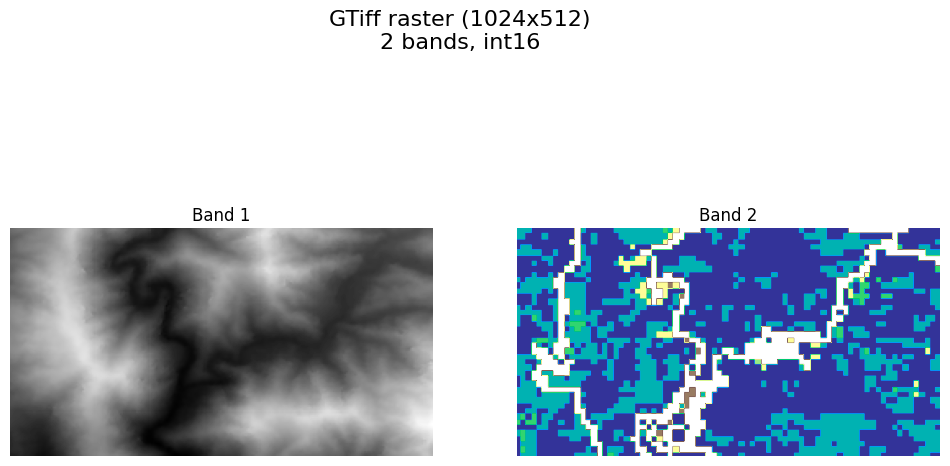

In [4]:
bbox = bounding_box
plot_multiband_raster(merged_data_path,bbox)

In [5]:
# show_dem(merged_data_path)
# show_dem("/Users/aakash/Desktop/MTP2/code/clipped.tif")
# show_dem(merged_elevation_path,'gray')
# show_dem(merged_landcover_path)

# Bounding box and path dataset filepath
- Add lat1,lon1 and lat2,lon2
- Change resolution
- Add dataset(.tif files) filepath (for GDAL interface (without tiling))

In [9]:
# USA random mountain
# lon1, lat1 = -109.83007049344715, 44.36470033197011
# lon2, lat2 = -109.7513685303535, 44.29673563882564

# India
# lon1, lat1 = 77.28112208857522,32.135432817449384
# lon2, lat2 = 77.62169826045022,31.94918029751246

# Colorado [Whole region]
# lon1, lat1 = -106.72643114729188,38.84785651131714
# lon2, lat2 = -105.95392348402243,39.458493653253676

# Colorado (peak to peak example)
# lat1, lon1 = 38.94374018363843, -106.5759101561709
# lat2, lon2 = 39.04527792014898, -106.38578062842298

# manali (hanuman tibba - manali)
# 31.928,76.854
# 31.694, 77.310

#
# lat1, lon1 = 32.372571, 76.983637
# lat2, lon2 = 32.189737, 77.315875

#
# lat1, lon1 = 32.474, 77.110
# lat2, lon2 = 32.306, 77.745

# # palan - sosan 
# lat1, lon1 = 32.537047, 76.554121
# lat2, lon2 = 31.924304, 77.535921

# # arnehar - mandi
# lat1, lon1 = 31.778518, 77.013229
# lat2, lon2 = 31.764576, 77.042884

# # keylong - tosh
# lat1, lon1 = 32.553983959102354, 76.9572465564983
# lat2, lon2 = 32.02887381373745, 77.50664575756166

# # menthosa - sosan
# lat1, lon1 = 32.90954351269039, 76.68373432249861
# lat2, lon2 = 31.863216801377973, 77.67972370282335

resolution = 30

# lat1, lon1 = 31.737946830245892, 76.98328796870653
# lat2, lon2 = 31.70144173323603, 77.01350037105028

# lat1, lon1 = 31.795655, 76.965705
# lat2, lon2 = 31.771989, 77.016619

bbox = (lon1,lat2, lon2 ,lat1) 

# Generate Matrix
- Using GDAL tile interface

In [10]:
map_data, bounds, tf = getDataBoundingBox(merged_data_path, bbox)

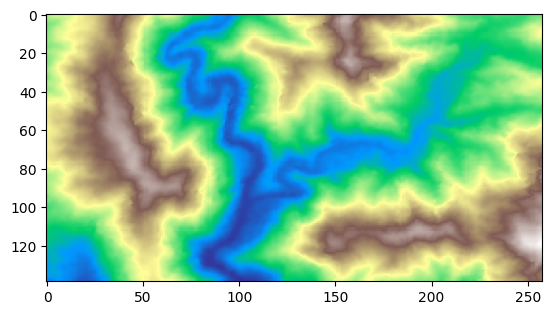

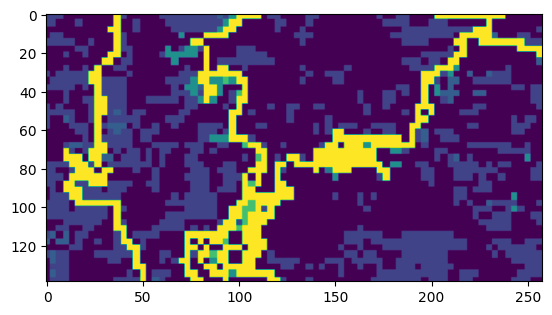

(2, 139, 258)


In [8]:
plt.imshow(map_data[0],cmap='terrain')
plt.show()
plt.imshow(map_data[1])
plt.show()
print(map_data.shape)

In [9]:
print("Elevation Map Info")
print(f"Gray Map Shape: {map_data[0].shape}")
print(f"Min: {map_data[0].min()}")
print(f"Max: {map_data[0].max()}")

Elevation Map Info
Gray Map Shape: (139, 258)
Min: 946
Max: 1780


Source and Destination

In [10]:

# USA random
# src_lon,src_lat = -109.81884898177093,44.32480359458633
# des_lon,des_lat = -109.77537406272984,44.30294042398075

# src_lat, src_lon = 38.98065379328955, -106.528761396495
# des_lat, des_lon = 39.02089538747208, -106.42163602957328

# src_lat, src_lon = 32.243724, 77.204016
# src_lat, src_lon = 32.350336, 77.129226

# hanuman tibba
# src_lat, src_lon = 32.216951, 77.231191
# des_lat, des_lon = 32.341876, 77.040854

# src_lat, src_lon = 31.775167, 77.017773
# des_lat, des_lon = 31.772527, 77.029848

# # palan
# # src_lat, src_lon = 32.369789, 76.766289
# # des_lat, des_lon = 32.076790, 77.312516

# # menthosa - sosan
# src_lat, src_lon = 32.80644936709285, 76.82298402202355
# des_lat, des_lon = 32.29517226314917, 77.4885503853536


src_lat, src_lon = 31.794790544810002, 76.99715247898794
des_lat, des_lon = 31.776113205607807, 76.98354831486441


src_latIdx,src_lonIdx = findIndexFromCoordinate(bounding_box, map_data[0], src_lon, src_lat)
des_latIdx,des_lonIdx = findIndexFromCoordinate(bounding_box, map_data[0], des_lon, des_lat)

# src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
# des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

In [11]:
print(src_latIdx,src_lonIdx)
print(des_latIdx,des_lonIdx)


25 157
94 107


Dijkstra

In [13]:
# from dijkstra import dijkstraFromSrc, dijkstraFromSrcWithLC, showPathDijkstra
from dijkstra import dijkstraFromSrc, showPath, generatePath, dijkstraFromSrcToRoad

In [75]:
alpha = 0
h_weight = 0.1
slope = 40
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, src_latIdx, src_lonIdx, resolution)
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, landcover_map, src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)
distFromSrc, parentMat = dijkstraFromSrc(map_data[0], map_data[1], src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)

In [14]:
# (des_x, des_y) 
alpha = 0
h_weight = 0.1
slope = 30

distFromSrc, parentMat, (des_latIdx, des_lonIdx) = dijkstraFromSrcToRoad(map_data[0], map_data[1], src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)


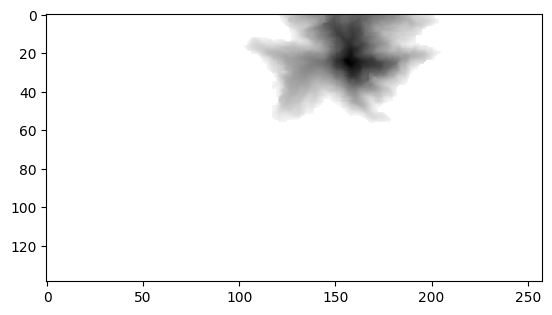

In [15]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

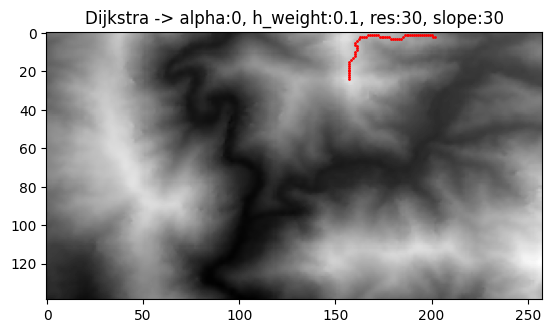

In [16]:
showPath(map_data[0], parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx,alpha,h_weight,resolution,slope)

In [18]:
src = (src_latIdx,src_lonIdx)
des = (des_latIdx,des_lonIdx)
a = generatePath(map_data[0], parentMat,src ,des )

NameError: name 'a' is not defined